### Анализ бизнес-показателей развлекательного приложения Procrastinate Pro+.

**Цель проекта:** проанализировать бизнес-метрики приложения Procrastinate Pro+, чтобы выяснить, почему компания терпит убытки. 

**Задачи:** 

- изучить, откуда приходят пользователи и какими устройствами они пользуются

- сколько стоит привлечение пользователей из различных рекламных каналов

- сколько денег приносит каждый клиент

- окупаются ли расходы на привлечение клиента

- какие факторы мешают привлечению клиентов.

**Описание данных:** датасеты за период с 1.05.2019 по 27.10.2019 с информацией о посещениях сайта - ***visits_info_short.csv:***, с информацией о заказах - ***orders_info_short.csv***, с информацией о расходах на рекламу - ***costs_info_short.csv***. 
    
Структура ***visits_info_short.csv:*** 

**User Id** — уникальный идентификатор пользователя,

**Region** — страна пользователя,

**Devie** — тип устройства пользователя,

**Channel** — идентификатор источника перехода,

**Session Start** — дата и время начала сессии,

**Session End** — дата и время окончания сессии.

Структура ***orders_info_short.csv:***

**User Id** — уникальный идентификатор пользователя,

**Event Dt** — дата и время покупки,

**Revenue** — сумма заказа.

Структура ***costs_info_short.csv:***

**dt** — дата проведения рекламной кампании,

**Channel** — идентификатор рекламного источника,

**costs** — расходы на эту кампанию.

### Шаг 1. Загрузите данные и подготовьте их к анализу

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore") 

In [2]:
try:
    visits = pd.read_csv(r'E:\ЯП\visits_info_short.csv')
    orders = pd.read_csv(r'E:\ЯП\orders_info_short.csv')
    costs = pd.read_csv(r'E:\ЯП\costs_info_short.csv')
except:
    visits = pd.read_csv('/datasets/visits_info_short.csv')
    orders = pd.read_csv('/datasets/orders_info_short.csv')
    costs = pd.read_csv('/datasets/costs_info_short.csv')

In [3]:
display(visits.head())
display(orders.head())
costs.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [4]:
#для начала проверим данные в таблице visits
visits.info()
visits.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


0

Необходимы следующие преобразования: 
    
**1.** Все названия колонок привести к нижнему регистру, и переименовать колонки. 

**2.** Session start и Session end привести к типу данных datetime.

In [5]:
#проверим, на неявные дубликаты в названиях.
for column in visits.columns:
    print(column, visits[column].unique())

User Id [981449118918 278965908054 590706206550 ... 519022174024 354394066496
 279181973476]
Region ['United States' 'UK' 'France' 'Germany']
Device ['iPhone' 'Mac' 'Android' 'PC']
Channel ['organic' 'TipTop' 'RocketSuperAds' 'YRabbit' 'FaceBoom' 'MediaTornado'
 'AdNonSense' 'LeapBob' 'WahooNetBanner' 'OppleCreativeMedia'
 'lambdaMediaAds']
Session Start ['2019-05-01 02:36:01' '2019-05-01 04:46:31' '2019-05-01 14:09:25' ...
 '2019-10-31 01:40:48' '2019-10-31 07:37:34' '2019-10-31 14:17:43']
Session End ['2019-05-01 02:45:01' '2019-05-01 04:47:35' '2019-05-01 15:32:08' ...
 '2019-10-31 01:41:31' '2019-10-31 07:37:55' '2019-10-31 15:17:04']


In [6]:
# преобразования
visits.columns = visits.columns.str.lower()
visits = visits.rename(columns = {'session start' : 'session_start', 'session end' : 'session_end', 'user id': 'user_id'})
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

In [7]:
# проверим таблицу orders
orders.info()
orders.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


0

**1.** Столбцы привести к нижнему регистру и переименовать. 

**2.** Event Dt перевести в формат datetime.

In [8]:
orders.columns = orders.columns.str.lower()
orders = orders.rename(columns = {'user id' : 'user_id', 'event dt' : 'event_dt'})
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

In [9]:
costs.info()
orders.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


0

**1.** Столбцы привести к нижнему регистру. 

**2.** dt перевести в формат datetime.

In [10]:
#проверка на неявные дубликаты в названиях
costs['Channel'].unique()

array(['FaceBoom', 'MediaTornado', 'RocketSuperAds', 'TipTop', 'YRabbit',
       'AdNonSense', 'LeapBob', 'OppleCreativeMedia', 'WahooNetBanner',
       'lambdaMediaAds'], dtype=object)

In [11]:
costs = costs.rename(columns = {'Channel' : 'channel'})
costs['dt'] = pd.to_datetime(costs['dt'])

В во всех трех таблицах не было обнаружено пропусков и дубликатов. 

Названия колонок были приведены к нижнему регистру, колонки с датой были переведены в формат datetime.

### Шаг 2. Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

In [12]:
# функция для получения пользовательских профилей
def get_profiles(sessions, orders, ad_costs):
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['dt'] = pd.to_datetime(profiles['dt'])
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )
    ad_costs = costs.merge(new_users, on=['dt', 'channel'], how='left')
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [13]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [14]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=20):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [15]:
# функция для получения LTV и ROI
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # сохраняем в датафрейм данные пользователей и значения CAC, 
        # добавив параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [16]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=20):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [17]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [18]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt_week'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [19]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=3):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt_week', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt_week', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Неделя привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt_week', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Неделя привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

### Шаг 3. Исследовательский анализ данных

#### 3.1. Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.

In [20]:
# вызовем функцию для составления профилей
profiles = get_profiles(visits, orders, costs)
profiles['dt_week'] = pd.to_datetime(profiles['dt']).dt.isocalendar().week
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost,dt_week
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172,19
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237,28
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000,40
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235,34
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769,40


In [21]:
print('Минимальная дата привлечения: {}, максимальная дата привлечения: {}'.format(profiles['dt'].min(), profiles['dt'].max()))

Минимальная дата привлечения: 2019-05-01 00:00:00, максимальная дата привлечения: 2019-10-27 00:00:00


Таким образом, даты из данных совпадают с датами из задания.

#### 3.2. Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [22]:
result = (profiles
    .groupby('region')
    .agg({'user_id': 'nunique', 'payer' : 'mean'})
    .sort_values(by = 'user_id', ascending = False)
    .rename(columns = {'user_id': 'users'})
)

result['share_of_users'] = result['users']/result['users'].sum()
result['paying_users'] = result['users']*result['payer']
result['share_of_paying_users'] = result['paying_users']/result['paying_users'].sum()

In [23]:
result

,users,payer,share_of_users,paying_users,share_of_paying_users
region,,,,,
United States,100002,0.069019,0.666644,6902.0,0.777165
UK,17575,0.039829,0.117160,700.0,0.078820
France,17450,0.037994,0.116327,663.0,0.074654
Germany,14981,0.041119,0.099868,616.0,0.069362


Пользователи приходят из 4 стран: ***США, Великобритания, Франция и Германия.*** 

***Большая часть пользователей из США - около 66%***, на остальные страны приходится по 10%. 

***Доля платящих пользователей так же выше всего в США, 7% против 3.7% - 4% в остальных странах.***

#### 3.3 Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [24]:
(profiles
    .groupby('device')
    .agg({'user_id': 'nunique', 'payer' : 'mean'})
    .sort_values(by = 'user_id', ascending = False)
    .rename(columns = {'user_id': 'users_number'})
)

,users_number,payer
device,,
iPhone,54479,0.062079
Android,35032,0.058518
PC,30455,0.050468
Mac,30042,0.063644


Пользователи заходит с 4-x видов устройств: ***iPhone, Android, PC, Mac. Максимальное количество пользователей заходит с iPhone - около 55 000. Наибольшая доля платящих пользователей приходится на Mac и Iphone.***

#### 3.4. Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения. 

In [25]:
profiles_by_channel = (profiles
                       .groupby('channel')
                       .agg({'user_id': 'nunique', 'payer' : 'mean'})
                       .sort_values(by = 'payer', ascending = False)
                       .rename(columns = {'user_id': 'users_number'})
                      )
profiles_by_channel['paying_users'] = profiles_by_channel['users_number']*profiles_by_channel['payer']
profiles_by_channel

,users_number,payer,paying_users
channel,,,
FaceBoom,29144,0.122049,3557.0
AdNonSense,3880,0.113402,440.0
lambdaMediaAds,2149,0.104700,225.0
TipTop,19561,0.096007,1878.0
RocketSuperAds,4448,0.079137,352.0
WahooNetBanner,8553,0.052964,453.0
YRabbit,4312,0.038265,165.0
MediaTornado,4364,0.035747,156.0
LeapBob,8553,0.030633,262.0


Среди рекламных компаний ***наибольшее число пользователей приходится на FaceBoom, затем идет TipTop***, соответственно на них приходится и ***больше всего платящих пользователей.***

Доля платящих пользователей ***максимальна для канала FaceBoom, AdNonSense, lambdaMediaAds и TipTop.*** 

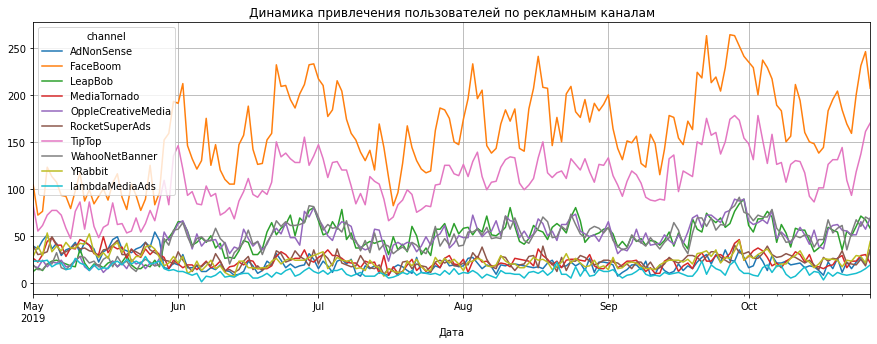

In [26]:
profiles.query('channel != "organic"').pivot_table(
    index = 'dt', 
    columns = 'channel', 
    values = 'user_id', 
    aggfunc = 'nunique'
).plot(figsize = (15,5), grid = True, title = 'Динамика привлечения пользователей по рекламным каналам', xlabel = 'Дата') 

plt.show()

***Из графика видно, что такое распределение по каналам характерно для всего периода наблюдений.***

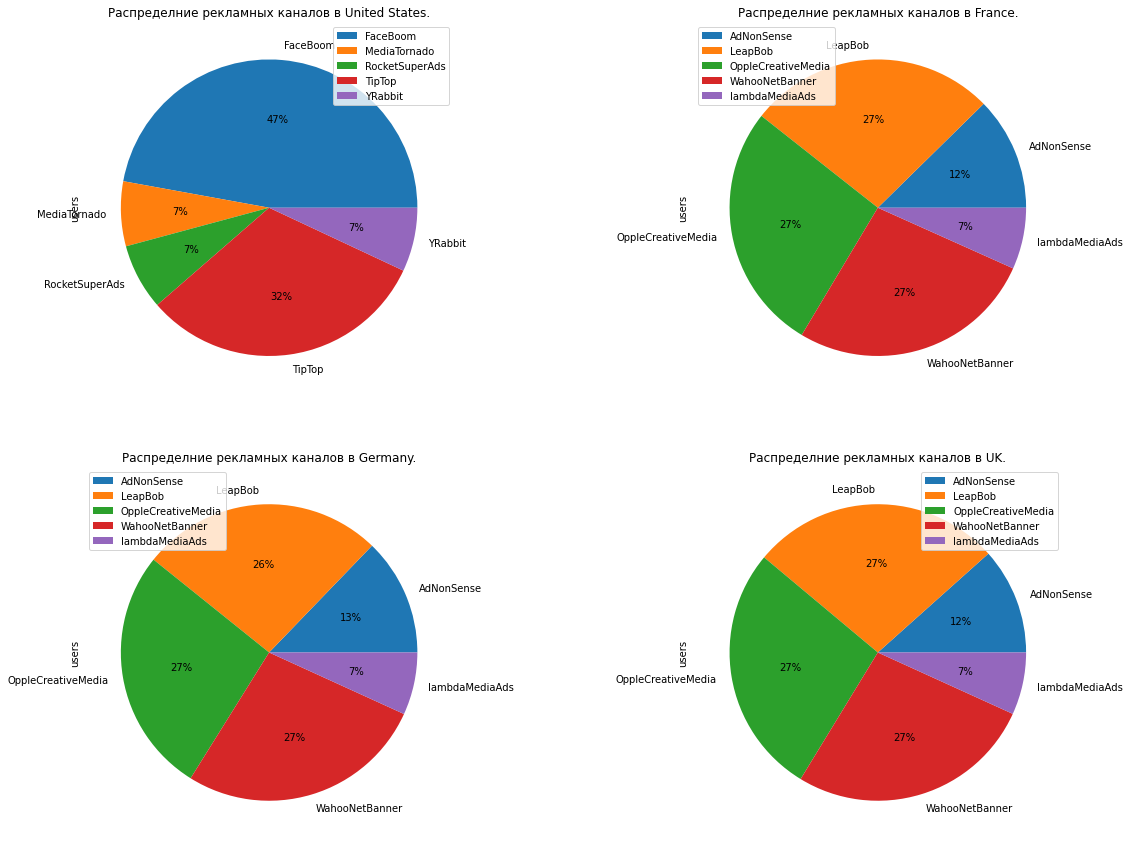

In [27]:
# проверим как распределены каналы привлечения в разных странах
plt.figure(figsize = (20, 10))

for i,region in enumerate(profiles['region'].unique()):
    (profiles
     .query('channel != "organic" and region == @region')
     .groupby('channel').agg({'user_id': 'nunique'})
     .rename(columns = {'user_id': 'users'})
     .plot(kind = 'pie', y='users', autopct='%1.0f%%', figsize=(20, 15), ax = plt.subplot (2,2, i +1)))
    plt.title('Распределние рекламных каналов в {}.'.format(region))

Из круговых диаграмм видно, что для пользователей из США **47% пользователей** (не считая органических) приходится на канал **FaceBoom**, на **TipTop - 32%**, далее значения в равной степени распределены между каналами **YRabbit, Media Tornado и RocketSuperAds**

В остальных странах эти каналы вообще не появляются. Во Франции, Германии и Великобритании пользователи привлекаются с помощью **OppleCreativeMedia, LeapBob и WahooNetBanner.**

### Шаг 4. Маркетинг

#### 4.1. Посчитайте общую сумму расходов на маркетинг.

In [28]:
print('Общие расходы на маркетинг: {}'.format(costs['costs'].sum().round(2)))

Общие расходы на маркетинг: 105497.3


#### 4.2. Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.

In [29]:
result = costs.groupby('channel')['costs'].sum().sort_values(ascending = False).to_frame()
result['share_costs'] = result['costs']/result['costs'].sum()
result

,costs,share_costs
channel,,
TipTop,54751.30,0.518983
FaceBoom,32445.60,0.307549
WahooNetBanner,5151.00,0.048826
AdNonSense,3911.25,0.037074
OppleCreativeMedia,2151.25,0.020392
RocketSuperAds,1833.00,0.017375
LeapBob,1797.60,0.017039
lambdaMediaAds,1557.60,0.014764
MediaTornado,954.48,0.009047


***Больше всего расходов*** приходится на рекламный канал ***TipTop (около 50% от всех расходов на рекламу)***, затем идет ***FaceBoom (30%)***, по остальным каналам расходы составляют менее 5% от общего количества расходов. 

#### 4.3. Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. 

In [30]:
#добавим столбцы с месяцем и неделей в таблицу costs
costs['dt_month'] = pd.to_datetime(costs['dt']).dt.month
costs['dt_week'] = pd.to_datetime(costs['dt']).dt.isocalendar().week

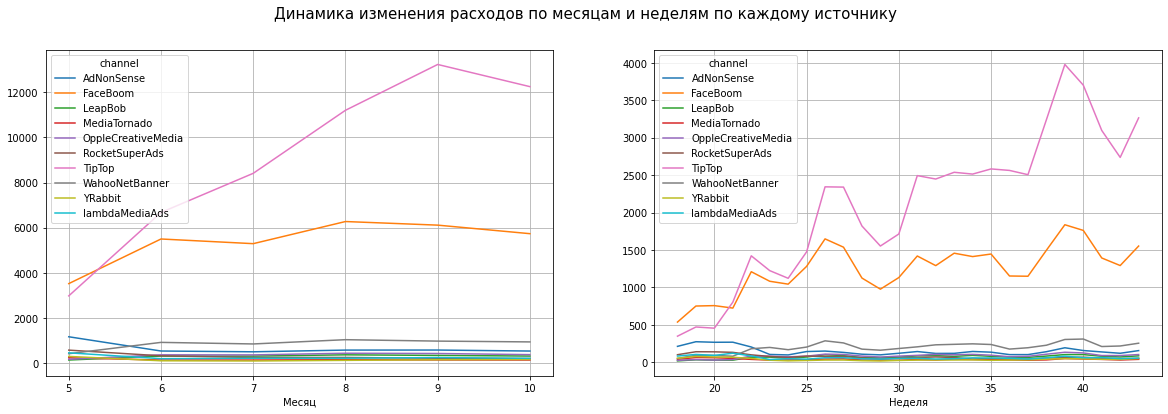

In [31]:
plt.figure (figsize = (20, 6))

(costs
     .pivot_table(index = ['dt_month'], columns = 'channel', values = 'costs', aggfunc = 'sum')
     .plot(grid = True, xlabel = 'Месяц', ax = plt.subplot(1,2,1))
);

(costs
     .pivot_table(index = ['dt_week'], columns = 'channel', values = 'costs', aggfunc = 'sum')
     .plot(grid = True, xlabel = 'Неделя', ax = plt.subplot(1, 2, 2))
);

plt.suptitle('Динамика изменения расходов по месяцам и неделям по каждому источнику', fontsize = 15);

На графиках так же видно, что ***максимальные затраты у двух каналов привлечения: TipTop и FaceBoom***, причем разница между ними постепенно увеличивается. 

Расходы на рекламу в FaceBoom росли в первый месяц, затем находились примерно на одном уровне. А ***расходы на рекламу в TipTop стремительно увеличивались на протяжении всего времени***, особенно выделяется пик в сентябре (38-39 недели), после этого затраты начали снижаться. 

В затратах по другим источниках нет особых пиков. 

<div class="alert alert-success">
  
  <b>Комментарий ревьюера</b>
    
  ✔️ Видим динамику расходов. TipTop и FaceBoom заметно выделяются.
</div>

#### 4.4. Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. 

In [32]:
# чтобы посмотреть, сколько в среднем стоит привлечение одного пользователя (CAC) возьмем таблицу с профилями 
# и сгруппируем по каналу, затем просуммируем затраты и разделим на размеры когорт по каналам.
cac = (profiles
    .groupby(['channel']).agg({'user_id': 'nunique'})
    .rename(columns = {'user_id': 'users_number'})
    .reset_index().merge(costs.groupby('channel')['costs'].sum(), on = ['channel'], how = 'left')).set_index('channel')

In [33]:
cac['cac'] = cac['costs']/cac['users_number']
cac = cac.fillna(0)
# рассчитаем средний CAC для всего проекта
print('Средний CAC проекта =', cac['costs'].sum()/cac['users_number'].sum())

Средний CAC проекта = 0.7032778251826572


In [34]:
cac.sort_values(by = 'cac', ascending = False)

,users_number,costs,cac
channel,,,
TipTop,19561,54751.30,2.799003
FaceBoom,29144,32445.60,1.113286
AdNonSense,3880,3911.25,1.008054
lambdaMediaAds,2149,1557.60,0.724802
WahooNetBanner,8553,5151.00,0.602245
RocketSuperAds,4448,1833.00,0.412095
OppleCreativeMedia,8605,2151.25,0.250000
YRabbit,4312,944.22,0.218975
MediaTornado,4364,954.48,0.218717


***Максимальный средний CAC у рекламного канала TipTop (2.8)***, у каналов ***FaceBoom и AdNonSense*** средние CAC составляют около 1.

Средний CAC для всех каналов составляет 0.7.

**Выводы:**

**1.** Общие расходы на маркетинг составили 105497.3, при этом 80% расходов приходятся на 2 рекламных канала **TipTop (50%) и FaceBoom (30%)**. 

**2.** Судя по графику динамики изменения расходов затраты на рекламу по **каналу TipTop повышаются на протяжении всего расмматриваемого периода.**

**3.** В среднем привлечение одного пользователя составляет 0.7, но CAC канала **TipTop** превышает этот показатель в 4 раза и составляет 2.8. У каналов **FaceBoom и AdNonSense** CAC около 1, для других каналов CAC менее 1. 

### Шаг 5. Оцените окупаемость рекламы

#### 5.1. Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [35]:
# исключим из profiles пользователей пришедших органически 
profiles_1 = profiles.query('channel != "organic"')
#для начала вызовем функцию get_ltv без разделения на когорты
result_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles_1, orders, datetime(2019, 10, 27).date(), 14)   

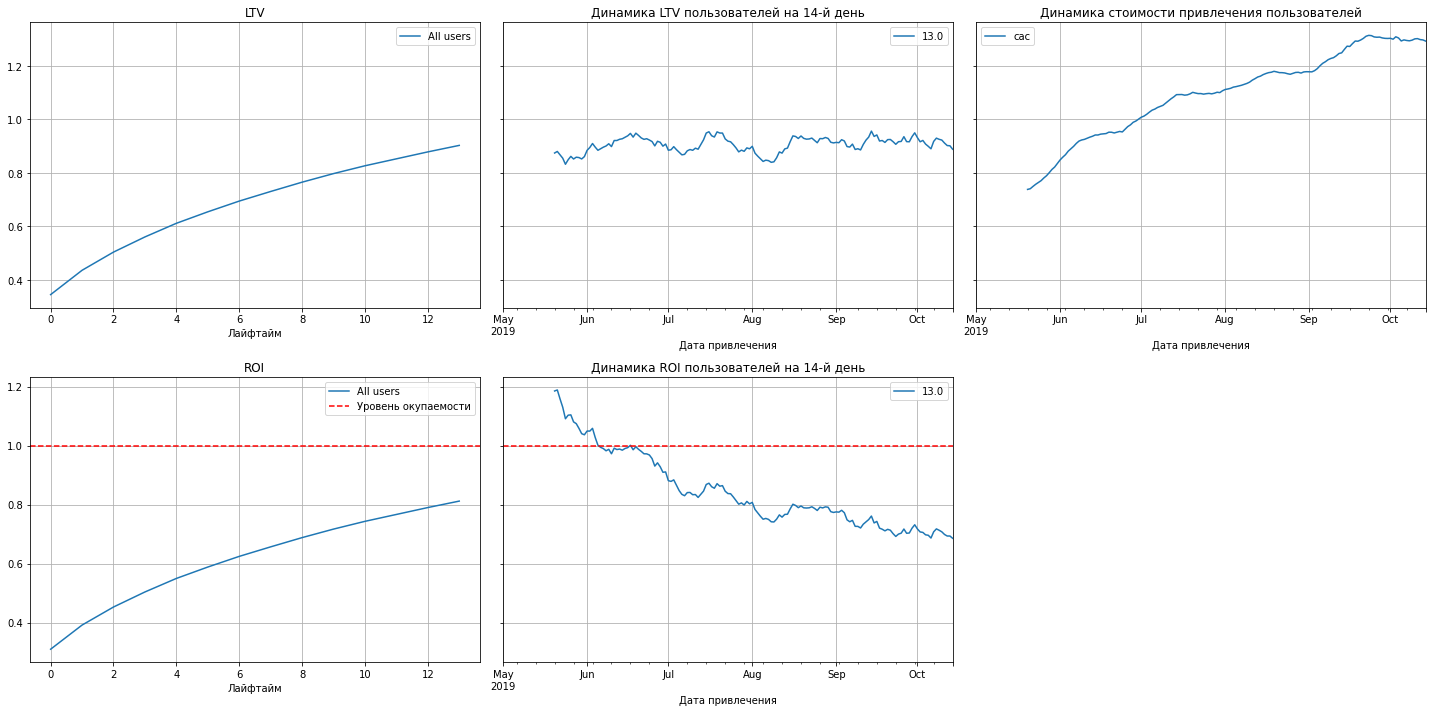

In [36]:
horizon_days = 14
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Из графиков можно сделать следующие **выводы:** 

**1.** LTV постепенно увеличивается к 14 дню.

**2.** Динамика LTV 14-го дня не имеет резких колебаний, можно сказать, что LTV не зависит от сезона/даты привлечения. К середине июня этот показатель достиг 0.7 и держится на этом уровне.

**3.** CAC повышается на протяжении всего времени датасета.

**4.** ***К 14 дню от даты привлечения ROI не достигает уровня окупаемости.***

**5.** Видно постепенное снижение в динамике ROI 14-го дня, после середины июня ROI становится ниже уровня окупаемости.

***Гипотеза:*** из-за увеличения стоимости привлечения на одного пользователя (CAC) реклама перестала окупаться, при этом "качество" пользователей (LTV) остался неизменным. 

#### 5.2. Проанализируйте окупаемость рекламы с разбивкой по устройствам. 

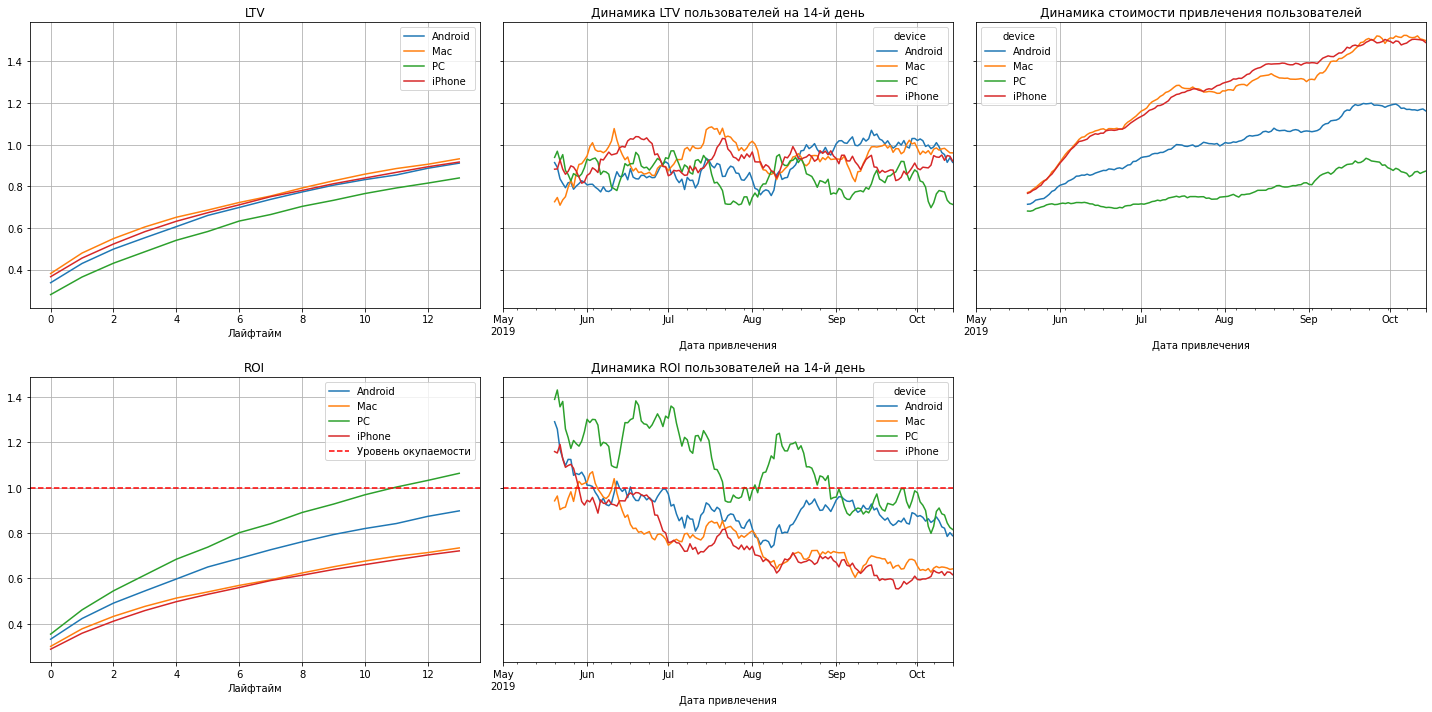

In [37]:
result_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = (
    get_ltv(profiles_1, orders, datetime(2019, 10, 27).date(), 14, dimensions = ['device']))   

horizon_days = 14
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

**Выводы:**

**1.** На всех устройствах LTV к 14 дню растет, незначительно меньше LTV у пользователей с PC.

**2.** Динамика LTV 14-го дня находится примерно на одном уровне, каких-либо сезонных или других колебаний нет.

**3.** Стоимость привлечения для пользователей с iPhone и Mac постепенно повышается и находится выше, чем для пользователей с Android и PC. 

**4.** ***Реклама окупается только для пользователей PC.*** 

**5.** С течением времени ROI понижается для всех устройств, но для устройств Mac, iPhone, Android ROI находится ниже уровня окупаемости уже с июня. 

***Гипотеза:*** привлечение пользователей с устройств Mac и iPhone (их больше всего среди всех пользователей) имеет слишком высокий CAC, поэтому они перестали окупаться. 

#### 5.3. Проанализируйте окупаемость рекламы с разбивкой по странам. 

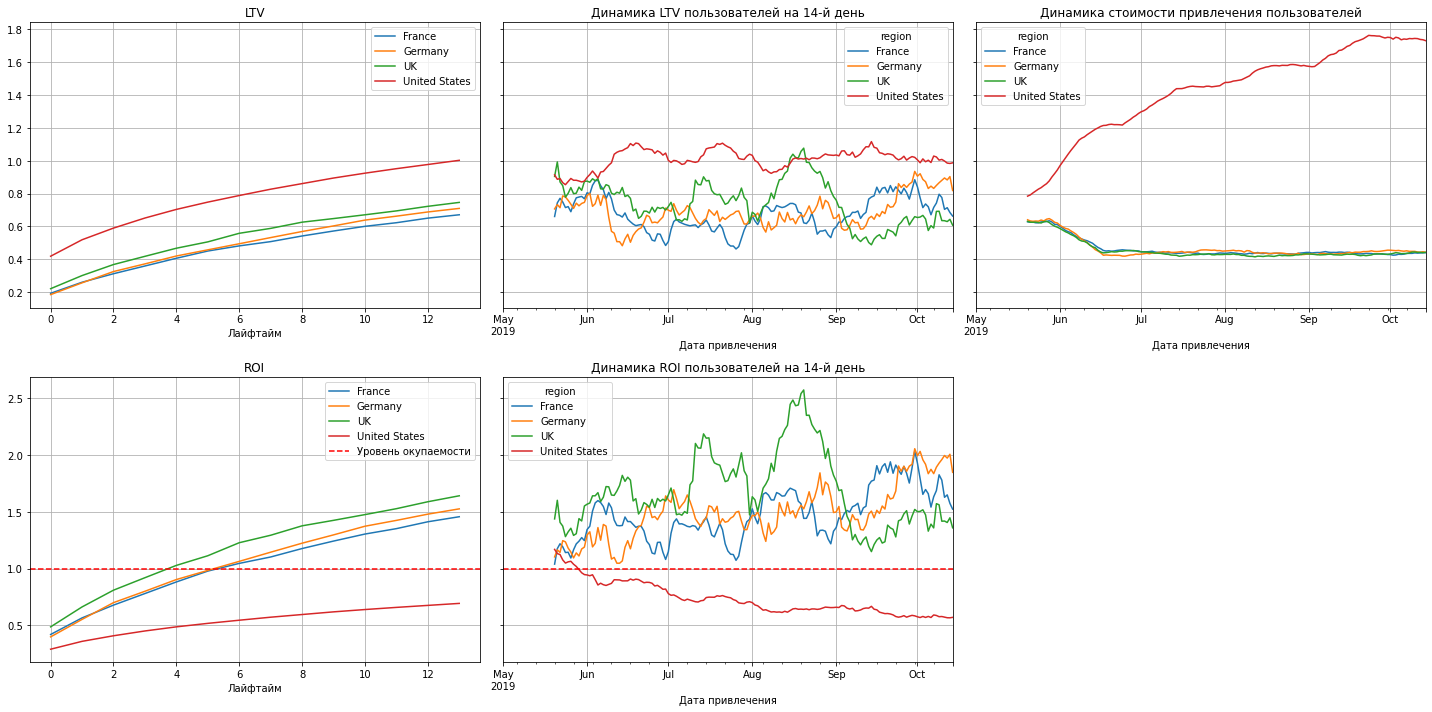

In [38]:
result_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = (
    get_ltv(profiles_1, orders, datetime(2019, 10, 27).date(), 14, dimensions = ['region']))   
horizon_days = 14
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

**Выводы:**

**1.** На всех устройствах LTV к 14 дню растет, у пользователей из США этот показатель выше, чем у других стран.

**2.** Динамика LTV 14-го имеет колебания по странам, но нет какой-то четкой зависимости. Видно, что LTV для пользователей США выше, начиная с середины июня.

**3.** CAC для пользователей из США увеличивается на протяжении всего рассматриваемого периода и значительно выше, чем CAC для пользователей из других стран.

**4.** ROI всех стран, кроме США имеет хороший уровень окупаемости, уже на 4 день реклама для пользователей из 3-х стран окупается. ***Для пользователей из США ROI даже к 14 дню не достигает уровня окупаемости***, а этих пользователей больше всего.

**5.** С течением времени ROI 14-го дня для пользователей из США понижается и с июня находится ниже уровня окупаемости. Для пользователей из других стран есть сезонные пики, которые намного превышают уровень окупаемости. 

***Гипотеза:*** Повышение цены привлечения пользователей из США влияет на то, что эти пользователи перестали окупаться, а они составляют большую часть пользователей.

#### 5.4. Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам.

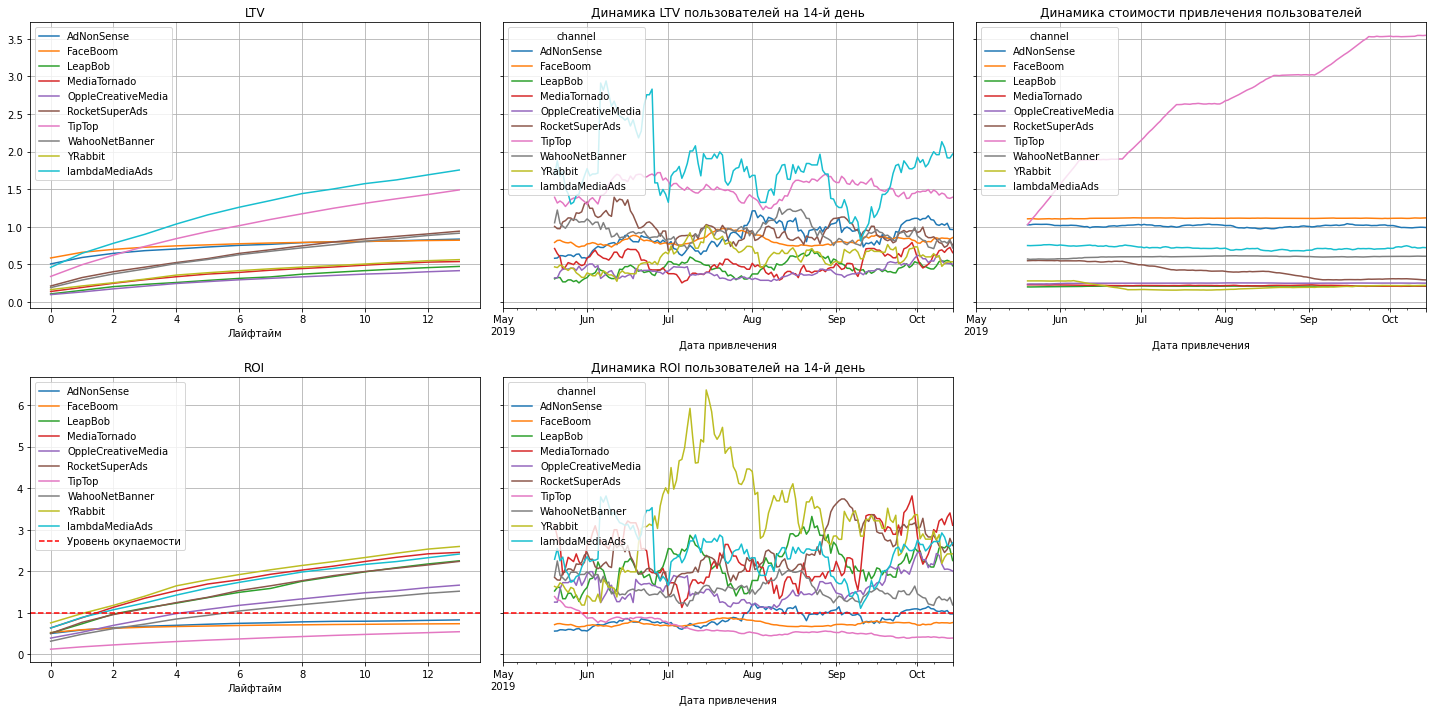

In [39]:
result_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = (
    get_ltv(profiles_1, orders, datetime(2019, 10, 27).date(), 14, dimensions = ['channel']))   

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

На данных графиках сложно описать динамику, поэтому построим отдельные для выделяющихся рекламных каналов.

По графику с LTV можно увидеть, что для всех источников LTV к 14 дню повышается, но у каналов ***lambdaMediaAds и TipTop*** этот показатель выше всего. 

***Стоимость привлечения (CAC) у канала TipTop увеличивается со временем и сильно отличается от всех остальных каналов***, по другим каналам нет каких-либо изменений. 

ROI каналов ***AdNonSense, FaceBoom, TipTop*** находятся ниже уровня окупаемости, при этом ROI других рекламных каналов окупается в первые 2-6 дней. 

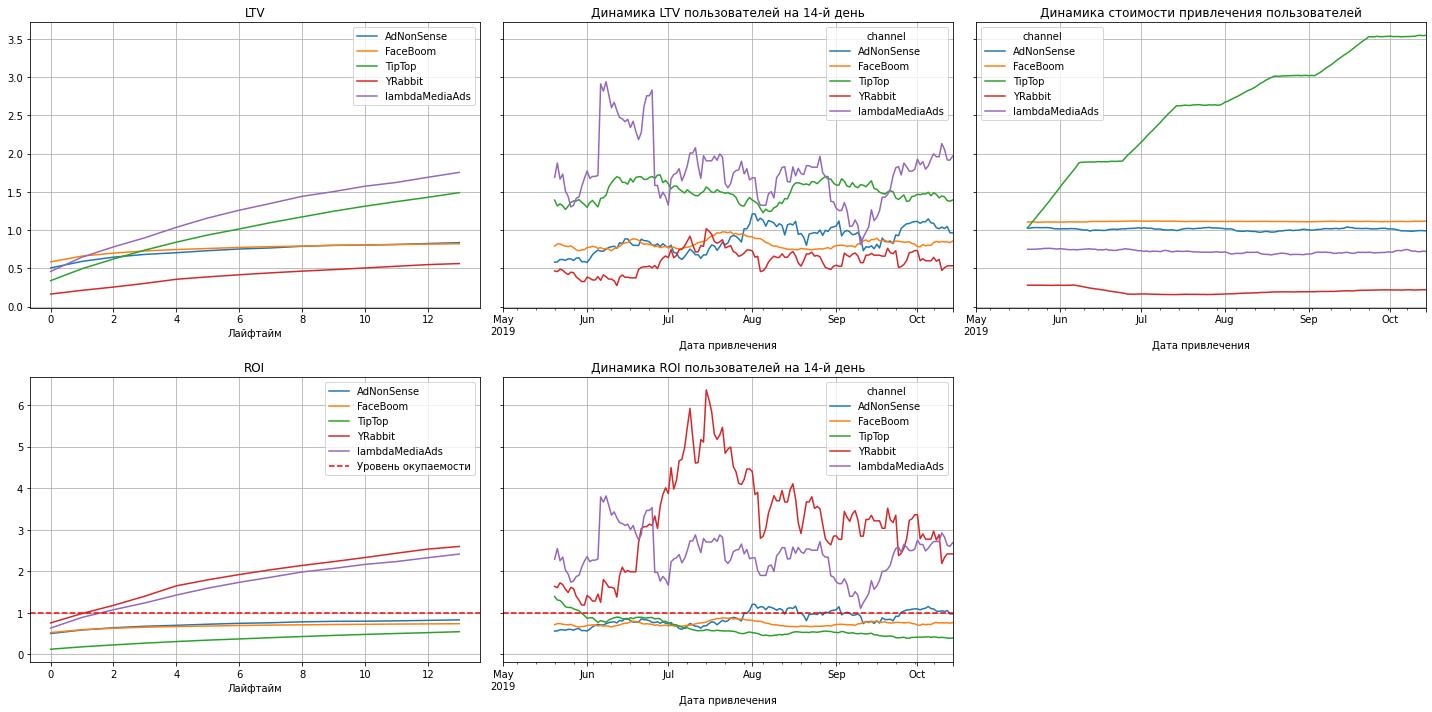

In [40]:
#были выбраны каналы с самыми низкими и высокими показателями окупаемости
query = 'channel in ("FaceBoom", "TipTop", "AdNonSense", "lambdaMediaAds", "YRabbit")'
plot_ltv_roi(ltv_grouped.query(query), ltv_history.query(query), roi_grouped.query(query), roi_history.query(query), horizon_days) 

***Каналы TipTop и FaceBoom*** имеют наибольший CAC, при этом на всем рассматриваемом периоде их ROI не достигал уровня окупаемости. 

***У канала lambdaMediaAds*** наибольший LTV к 14 дню и стабильный ROI, который выше уровня окупаемости. 

***У канала YRabbit*** относительно низкий LTV к 14 дню, при этом хороший уровень окупаемости.

**Выводы:**

***Пользователи из США, пользователи с устройствами iPhone и Mac, пользователи привлеченные с каналов TipTop, FaceBoom, AdNonSense стабильно не окупаются. Для всех этих категорий характерно повышение CAC.***

Чтобы убедиться, что это связано только с увеличившимся CAC посмотрим на конверсию и удержание пользователей.

#### 5.5. Проверьте конверсию и удержание пользователей и динамику их изменений. 

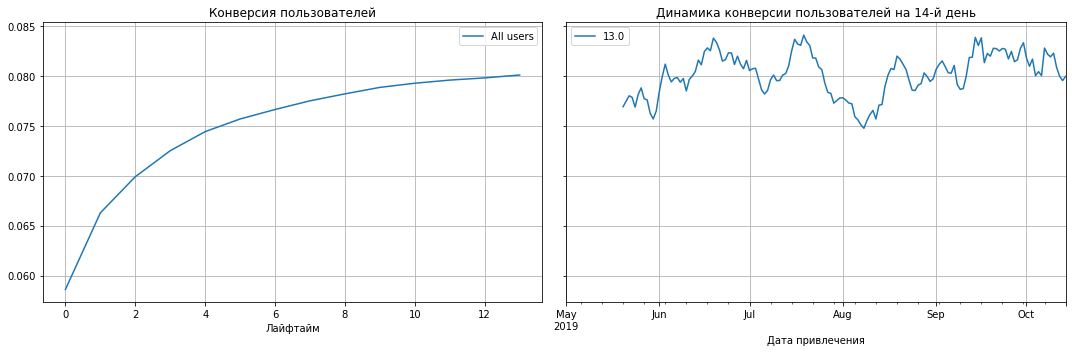

In [41]:
#вызовем функцию конверсии 
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_1, orders, datetime(2019, 10, 27).date(), 14)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

**Выводы:**

**1.** Пользователи достаточно хорошо конвертируются с 1 по 7 день, конверсия постепенно увеличивается к 14 дню и достигает **0.08**.

**2.** На графике динамики изменения видно, что конверсия имеет разброс от 0.075 до 0.085.

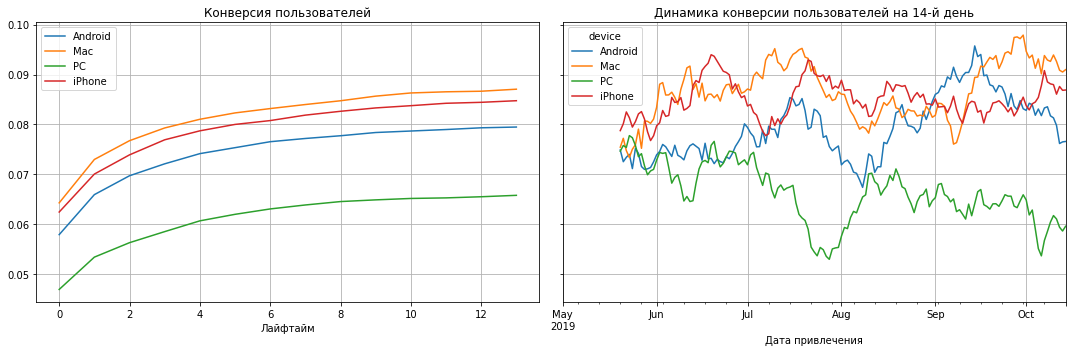

In [42]:
# рассмотрим конверсию по устройствам
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_1, orders, datetime(2019, 10, 27).date(), 14, dimensions = ['device'])
plot_conversion(conversion_grouped, conversion_history, horizon_days)

**Выводы:**

**1.** Ниже всего конверсия у пользователей с **PC - 0.065**, выше всего у пользователей с **Mac и iPhone - 0.085**.

**2.** Конверсия 14-го для пользователей с PC постепенно уменьшается, а для пользователей с Mac и iPhone увеличивается.

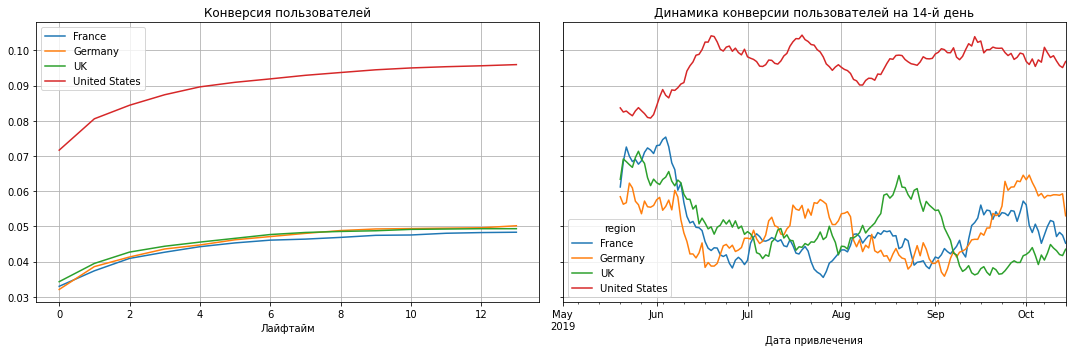

In [43]:
# проверим конверсию по странам 
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_1, orders, datetime(2019, 10, 27).date(), 14, dimensions = ['region'])

plot_conversion(conversion_grouped, conversion_history, horizon_days)

**Выводы:**

**1.** Конверсия пользователей из США намного выше, чем для пользователей из других стран и составляет более 0.095 к 14-му дню.

**2.** Конверсия имеет сглаженный вид для всех стран, то есть пользователи из неплатящих в платящие почти не переходят спустя 7 дней. 

**3.** В середине июня произошло резкое увеличение конверсии 14-го дня для пользователей из США и после этого она держится на уровне 0.1.

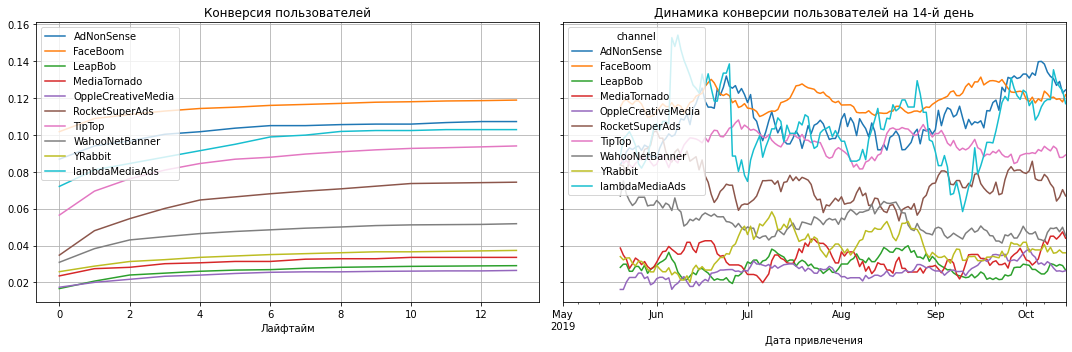

In [44]:
# рассмотрим конверсию по каналам привлечения
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_1, orders, datetime(2019, 10, 27).date(), 14, dimensions = ['channel'])
plot_conversion(conversion_grouped, conversion_history, horizon_days)

**Выводы:**

**1.** Линия конверсии имеет сглаженный вид, то есть пользователи почти не переходят из неплатящих в платящие спустя 3-5 дней.

**2.** Конверсия рекламного канала **FaceBoom максимальна и составляет 0.12**, затем идет каналы **AdNonSense, lambdaMediaAds, TipTop.**

**3.** Динамика конверсии 14-го дня по каналам различается не сильно, наибольшие колебания у рекламного канала lambdaMediaAds. 

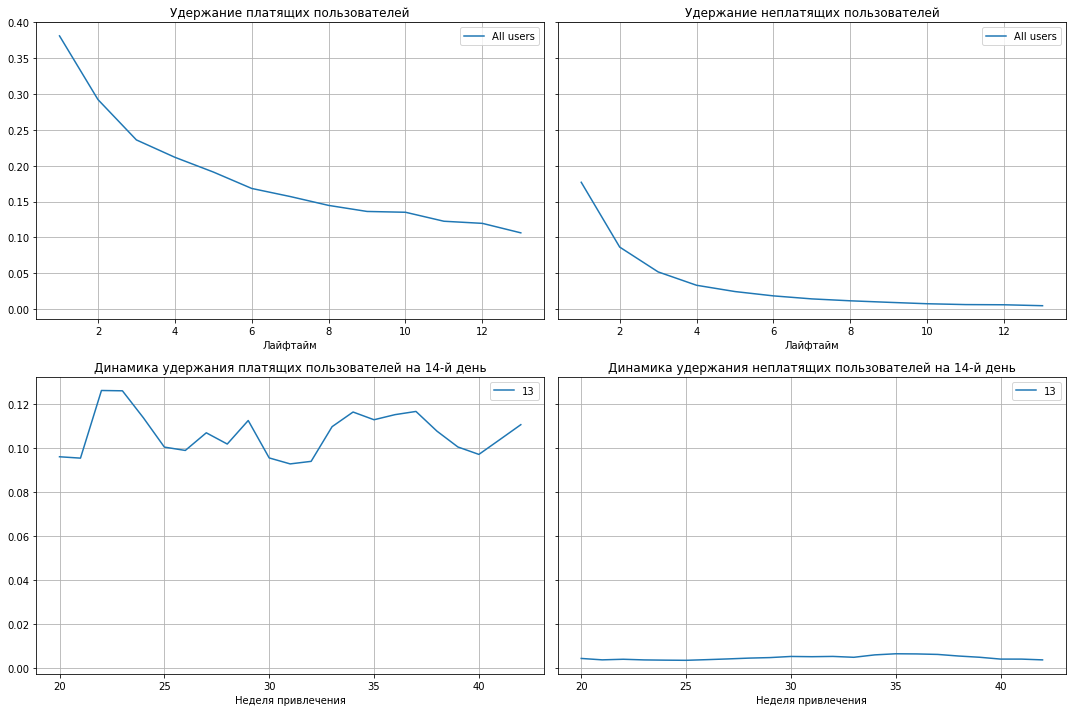

In [45]:
# вызовем функцию удержания
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_1, visits, datetime(2019, 10, 27).date(), 14)

plot_retention(retention_grouped, retention_history, horizon_days) 

***Удержание находится на достаточно низком уровне и к 14-му дню составляет около 0.12. Удержание платящих пользователей выше, чем неплатящих.***

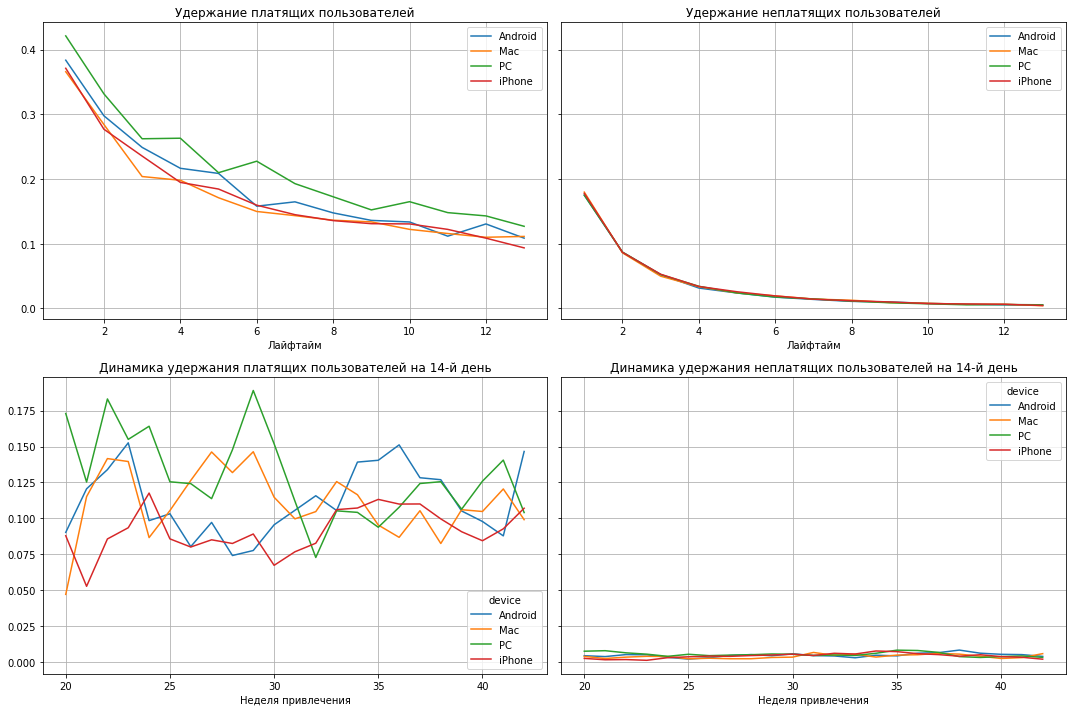

In [46]:
# вызовем функцию удержания по устройствам 
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_1, visits, datetime(2019, 10, 27).date(), 14, dimensions = ['device'])

plot_retention(retention_grouped, retention_history, horizon_days) 

***Удержание пользователей с PC чуть выше, чем пользователей с других устройств, но сильной разницы между устройствами не наблюдается.***

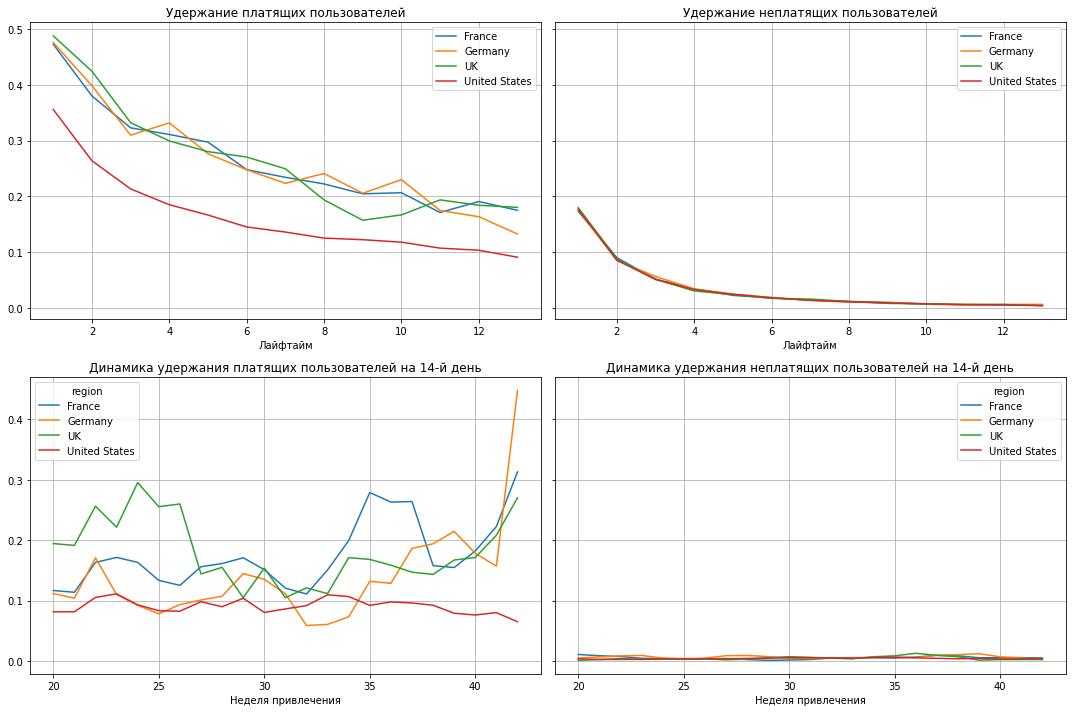

In [47]:
# вызовем функцию удержания по странам
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_1, visits, datetime(2019, 10, 27).date(), 14, dimensions = ['region'])

plot_retention(retention_grouped, retention_history, horizon_days) 

***Заметно, что удержание пользователей из США меньше, чем пользователей из других стран. Retention первого дня для США составляет менее 0.4 и сравним с общим Retention, так как большая часть пользователей из США.***

***По графику динамики удержания 14-го дня видно, что для пользователей из США оно всегда было на самом низком уровне среди других стран.*** Удержанеие в Германии дял платящих пользователей в последнее время стремительно растет.

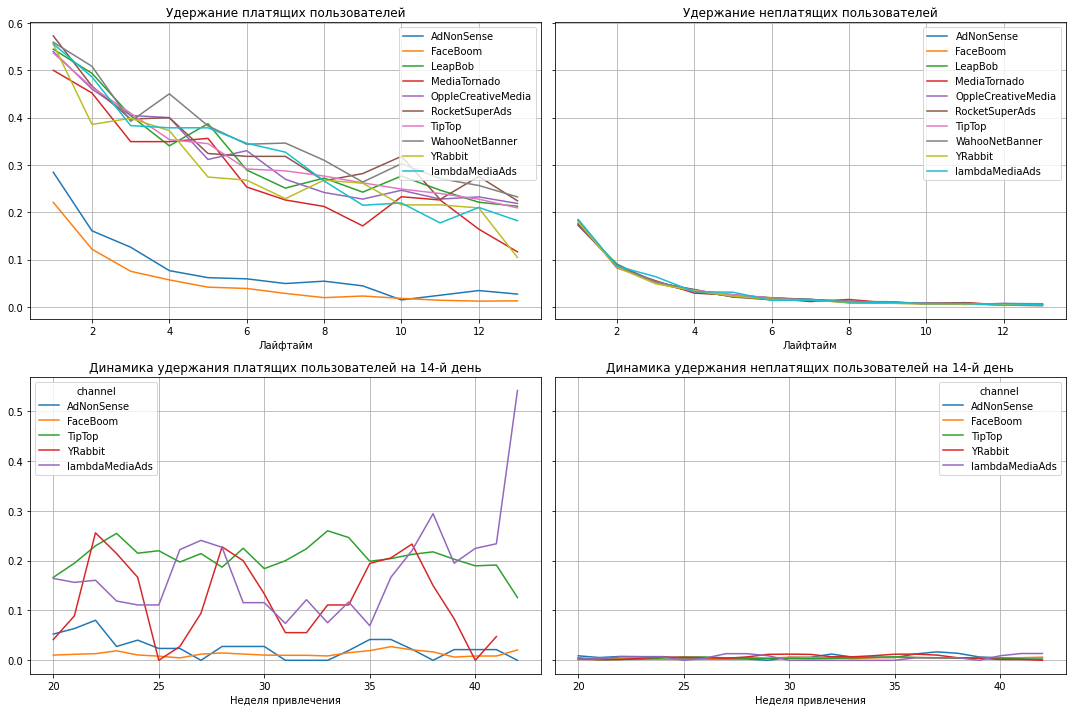

In [48]:
# вызовем функцию удержания по рекламным каналам
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_1, visits, datetime(2019, 10, 27).date(), 14, dimensions = ['channel'])

query = 'channel in ("FaceBoom", "TipTop", "AdNonSense", "lambdaMediaAds", "YRabbit")'
plot_retention(retention_grouped, retention_history.query(query), horizon_days)

Из графика удержания платящих пользователей выделяются 2 рекламных канала: **FaceBoom и AdNonSense**, у которых удержание значительно ниже, чем у других каналов и составляет менее **0.3 во 2 день.**

Из графика динамики удержания платящих пользователей видно, что для этих двух каналов удержание 14-го дня находится на уровне 0 на протяжении всего времени. Также выделяется канал **lambdaMediaAds**, у которого удержание 14-го дня стремительно растет в последнее время.

Таким образом, можно сделать **основные выводы**:

**1.** Реклама, направленная на привлечения пользователей не окупается. 

**2.** Негативное влияение на окупаемость рекламы в большей степени оказывают каналы привлечения и страны пользователей. Так, ***каланы TipTop и FaceBoom***, которые имеют наибольший CAC, находятся ниже уровня окупаемости. Также не окупается рекламный канал - **AdNonSense**, из-за низкого удержания и относительно высокого CAC.  

Для ***FaceBoom*** характерен самый высокий уровень конверсии среди рекламных каналов, но также самый низкий уровень удержания пользователей и низкий LTV. То есть, переход из неплатящих в платящих клиентов происходит только в первые пару дней, в дальнейшем линия конверсии, LTV почти не изменяются. **При этом CAC находится на одном уровне для всего периода, но эти расходы на рекламу все равно превышают доход от клиентов.**

Для ***TipTop*** характерен средний уровень конверсии относительно других каналов, хороший уровень удержания, высокий уровень LTV относительно других каналов, но для этого канала характерно **постоянное увеличение CAC. Из-за этого канал окупался в начале, но затем перестал.**
 
**3.** Среди стран ROI находится ниже уровня окупаемости **только в США**, что прежде всего связано с тем, что пользователи из США составляют 66% от всех пользователей и основная часть из них привлекается с **помощью FaceBoom и TipTop.** 

**Рекомендации:**

- перенаправить расходы с источников **FaceBoom, TipTop, AdNonSense** в рекламные каналы, которые окупаются больше и при этом имеют высокий уровень конверсии и удержания. Это ***RocketSuperAds для аудитории из США и lambdaMediaAds для других стран.*** 

- расширить аудиторию из Франции, Германии и Великобритании, так как пользователи из этих стран показывают хороший уровень окупаемости и высокое удержание.

- обратить внимание на удержание пользователей из США, так как на данный момент они составляют большую часть пользователей. 